In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from wordcloud import WordCloud, STOPWORDS

In [4]:
coursera_coursers_df = pd.read_csv('../datasets/Coursera_courses.csv')
coursera_reviews_df = pd.read_csv('../datasets/Coursera_reviews.csv')
edx_df = pd.read_csv('../datasets/edx_courses.csv')
udemy_df = pd.read_csv('../datasets/udemy_courses.csv')

Observamos el numero de registros y columna  en cada df

In [5]:
display(coursera_coursers_df.shape)
display(coursera_reviews_df.shape)
display(edx_df.shape)
display(udemy_df.shape)

(623, 4)

(1454711, 5)

(975, 16)

(3678, 12)

### Coursera

Primero se trabajara con el contenido correspondiente a Coursera 

In [6]:
display(coursera_coursers_df.head(3))
display(coursera_reviews_df.head(3))

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training


Chequeamos si los valores en las columnas de course_id de cada df coinciden para juntarlas en un unico df

In [7]:
# Obtener los valores únicos de las columnas 'course_id'
coursera_courses_ids = coursera_coursers_df['course_id'].unique()
coursera_reviews_ids = coursera_reviews_df['course_id'].unique()

# Verificar si los valores coinciden
coinciden = coursera_reviews_df['course_id'].isin(coursera_courses_ids)

# Imprimir los resultados
coinciden.value_counts()

course_id
True    1454711
Name: count, dtype: int64

Podemos que todos los valores coinciden permitiendos unir los cursos con en el df de cursos con su respectiva review en el df de review.

In [8]:
# Fusionar los DataFrames usando una unión izquierda (left join) en 'course_id'
merged_df = pd.merge(coursera_coursers_df, coursera_reviews_df, on='course_id', how='left')

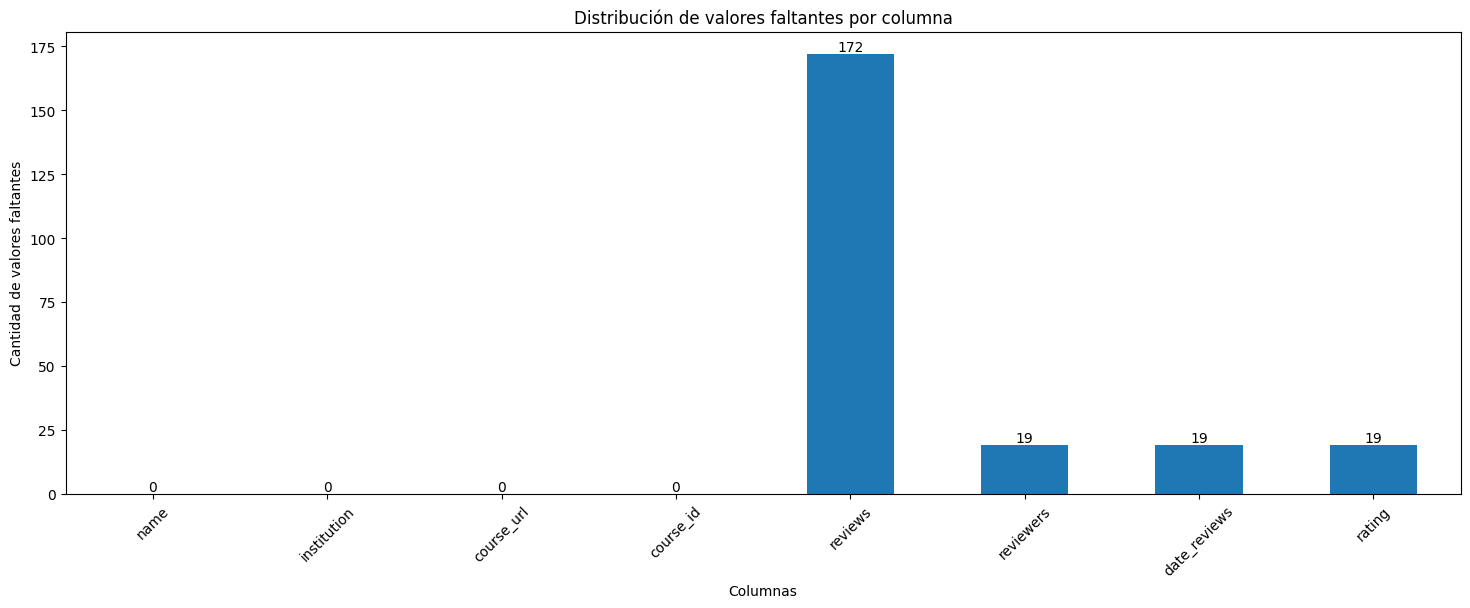

In [9]:
# Obtener el número de valores faltantes por columna
missing_values = merged_df.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(18, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.title('Distribución de valores faltantes por columna')
plt.xticks(rotation=45)
# Mostrar el número de datos correspondiente al posar el mouse sobre las barras
for i, value in enumerate(missing_values):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

Encontramos varios datos faltantes, veamos la naturaleza de estos.

In [10]:
merged_df.loc[merged_df.isnull().any(axis=1)]

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
65678,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,NaN,By Ritu K,"Aug 04, 2020",4.0
65689,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,NaN,By Ritu K,"Aug 04, 2020",4.0
65700,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,NaN,By Ritu K,"Aug 04, 2020",4.0
171302,The Bits and Bytes of Computer Networking,Google,https://www.coursera.org/learn/computer-networ...,computer-networking,NaN,By Christopher L J,"Sep 26, 2020",5.0
171311,The Bits and Bytes of Computer Networking,Google,https://www.coursera.org/learn/computer-networ...,computer-networking,NaN,By Jerold K G,"Jun 10, 2020",5.0
...,...,...,...,...,...,...,...,...
1369292,Digital Marketing Analytics in Practice,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/digital-analytics,digital-analytics,NaN,NaN,NaN,NaN
1401514,Dairy Production and Management,The Pennsylvania State University,https://www.coursera.org/learn/dairy-production,dairy-production,NaN,NaN,NaN,NaN
1410719,Security & Safety Challenges in a Globalized W...,Universiteit Leiden,https://www.coursera.org/learn/security-safety...,security-safety-globalized-world,NaN,NaN,NaN,NaN
1454728,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution,NaN,NaN,NaN,NaN


1. Encontramos que todos los datos faltantes no tienen Review. Esto no es un gran problema ya que es comun encontrar reviews de gente con solo la votacion y sin dejar comentarios.
2. La faltan fechas y rating estos datos faltantes. Estos si son de suma importancia para el analisis debido a estas 2 columnas evidencian la popularidad del curso; Los datos faltantes en ambas Columnas seran eliminados.
3. En la columna de reviewers podemos encontrar algunas valores faltantes, los cuales no son de gran importancia para el analisis.
4. Por ultimo podemos indentifar en los 3 primeros registros que se repite la misma review en 3 ocasiones, lo cual deja en sospecha que puede haber aun mas casos de reviews repetidas que puedan causar problemas a la hora de analizar los datos.

Eliminamos los valores nulos en las columnas de fecha y rating.

In [11]:
merged_df.dropna(subset=['date_reviews', 'rating'], inplace=True)

In [12]:
merged_df.isna().sum()

name              0
institution       0
course_url        0
course_id         0
reviews         153
reviewers         0
date_reviews      0
rating            0
dtype: int64

Ahora eliminemos los valores duplicados

In [13]:
merged_df.duplicated().sum()


934764

Esto puede causar problemas a la hora de hacer el análisis de los datos debido a que los registros duplicados pueden distorsionar los resultados y sesgar las conclusiones que se obtengan. Al tener registros duplicados, es probable que se esté contando varias veces la misma información, lo que puede llevar a interpretaciones incorrectas y a la obtención de métricas y estadísticas sesgadas.

In [14]:
merged_df = merged_df.drop_duplicates().copy()

In [15]:
display(merged_df.loc[merged_df['reviewers'] == 'By Ritu K'])
print('Numero de registros duplicados:',merged_df.duplicated().sum())

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
65678,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,NaN,By Ritu K,"Aug 04, 2020",4.0
1387635,Getting Started with Google Kubernetes Engine,Google Cloud,https://www.coursera.org/learn/google-kubernet...,google-kubernetes-engine,I want to join this course on free.,By Ritu K,"Apr 22, 2020",5.0


Numero de registros duplicados: 0


De esta manera nos aseguramos que no haya valores repetidos en el df.

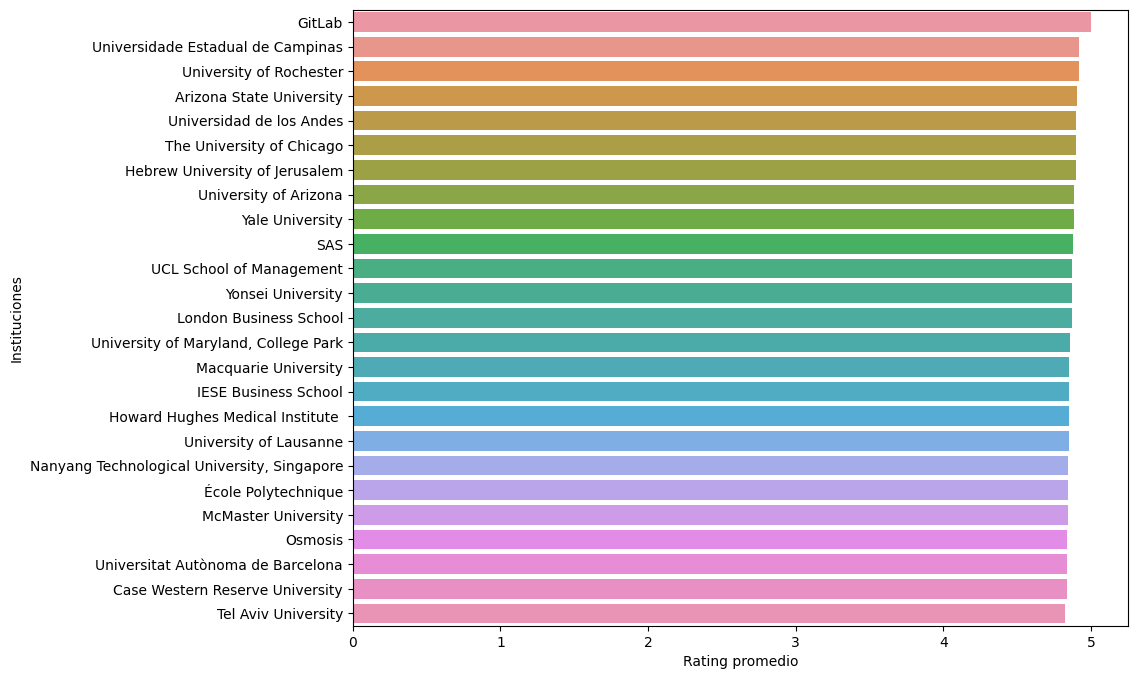

In [16]:
institution_df = merged_df.groupby('institution')['rating'].mean()
students_per_institution = pd.DataFrame({'institution': institution_df.index, 'rating': institution_df.values})
students_per_institution = students_per_institution.sort_values('rating', ascending=False)

limit_institution = students_per_institution.head(25)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y='institution', x='rating', data=limit_institution)
plt.xlabel('Rating promedio')
plt.ylabel('Instituciones')
plt.show()

Esta grafica nos da a entender de la calidad del contenido de la plataforma. Si las primeras 25 instituciones tienen una calificacion tan similiar, esto nos concluir que hay muy buenos cursos en la plataforma.

### EDX

Empezamos con la plataforma de EDX

In [17]:
edx_df = pd.read_csv('../datasets/edx_courses.csv')

In [18]:
edx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [19]:
edx_df.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


1. Encontramos algunos valores faltantes en ciertas columnas.
2. Podemos ver que columnas como n_enrolled y price deberian ser de valor numerico como podemos evidenciar en la naturaleza de sus datos; tambien podemos ver como podemos reformar y dividir los datos de ciertas columnas para crear un analisis mas completo.

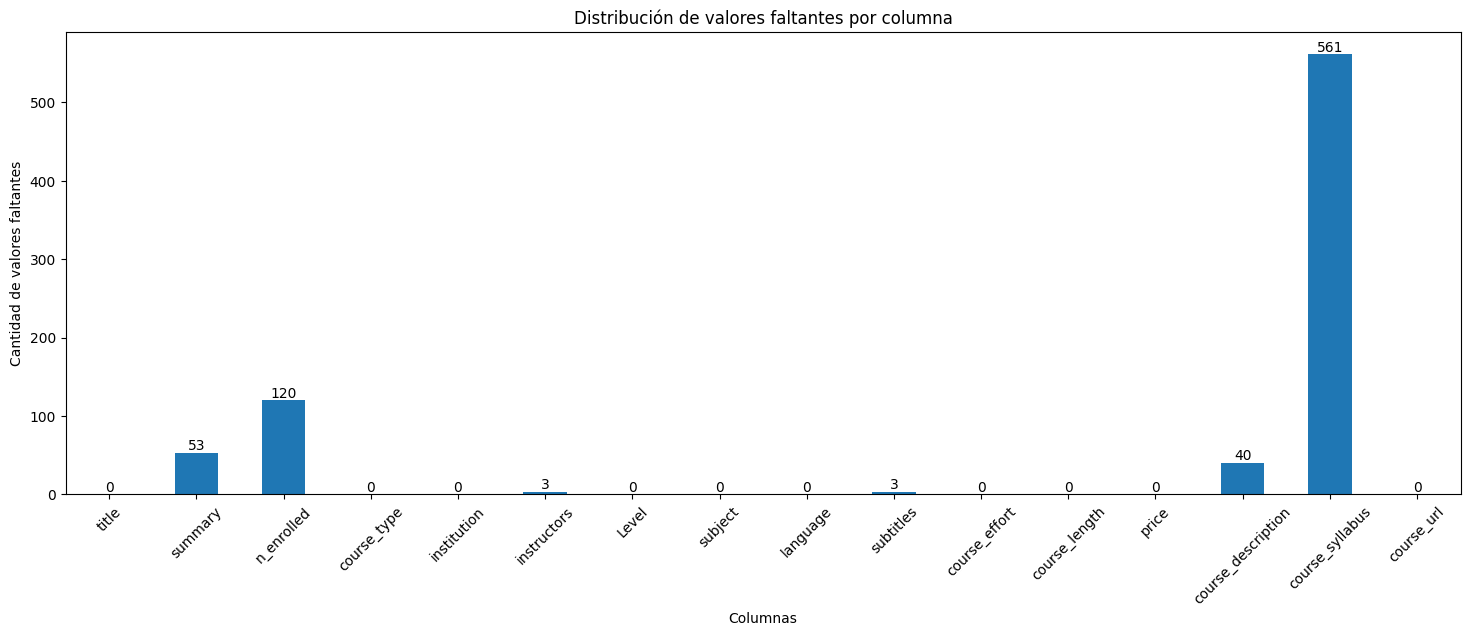

In [20]:
# Obtener el número de valores faltantes por columna
missing_values = edx_df.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(18, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.title('Distribución de valores faltantes por columna')
plt.xticks(rotation=45)
# Mostrar el número de datos correspondiente al posar el mouse sobre las barras
for i, value in enumerate(missing_values):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

1. Debido a la gran cantidad de datos no disponibles en la columna de course_syllabus, sera dropeada.
2. La columna de summary no tiene necesidad de eliminar los datos perdidos debido a que no afectan al analisis de datos que se hara en el futuro.
3. Hay que hacer un analisis mayor para saber que hacer con la columna de n_enrolled.

In [21]:

#* 1. Dropear columna course_syllabus
edx_df.drop(columns=['course_syllabus'], axis=1, inplace=True)

In [22]:

#* 3. Ver naturaleza de los datos faltantes en n_enrolled
edx_df.loc[edx_df['n_enrolled'].isnull()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
13,English Grammar and Style,Learn key concepts and strategies in grammar a...,NaN,Instructor-led on a course schedule,The University of Queensland,Roslyn Petelin,Introductory,Humanities,English,English,3–4 hours per week,8 Weeks,FREE-Add a Verified Certificate for $99 USD,With the rise of social media and the Internet...,https://www.edx.org/course/english-grammar-and...
459,Business Communication,Learn how to effectively communicate and build...,NaN,Self-paced on your time,Rochester Institute of Technology,Andrea Hickerson-Keri Barone,Introductory,Communication,English,English,4–6 hours per week,3 Weeks,FREE-Add a Verified Certificate for $199 USD,Business communication is vital to professiona...,https://www.edx.org/course/business-communicat...
462,Agua 2.0: empresas eficientes para el siglo XXI,El curso te presenta una visión integral de la...,NaN,Self-paced on your time,Inter-American Development Bank,Sergio Campos-Corinne Cathala-Federico Pérez,Introductory,Business & Management,Español,Español,2–3 hours per week,8 Weeks,FREE-Add a Verified Certificate for $25 USD,¿Eres un profesional o actor activo del sector...,https://www.edx.org/course/agua-20-empresas-ef...
494,Introduction to Cloud Computing,"Master the core concepts in Cloud Computing, f...",NaN,Self-paced on your time,IBM,Rav Ahuja,Introductory,Computer Science,English,English,1–2 hours per week,6 Weeks,FREE-Add a Verified Certificate for $49 USD,This course introduces you to the core concept...,https://www.edx.org/course/introduction-to-clo...
502,SQL aplicado en la ciencia de datos,Aprende a usar y aplicar el poderoso lenguaje ...,NaN,Self-paced on your time,IBM,Rav Ahuja,Introductory,Data Analysis & Statistics,Español,Español,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $39 USD,Gran parte de los datos del mundo viven en bas...,https://www.edx.org/course/sql-aplicado-en-la-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Drones and Autonomous Systems 2: Applications ...,Learn the latest applications of unmanned aeri...,NaN,Self-paced on your time,University of Maryland Global Campus-Universit...,"Brian Powers, M.A.",Intermediate,Science,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,If you want to be the technology specialist wh...,https://www.edx.org/course/drones-and-autonomo...
968,MathTrackX: Differential Calculus,Discover concepts and techniques relating to d...,NaN,Self-paced on your time,University of Adelaide,Dr Melissa Humphries-Dr Danny Stevenson-Dr Dav...,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part three of the MathTrackX XS...,https://www.edx.org/course/mathtrackx-differen...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,https://www.edx.org/course/pattern-studying-an...


Podemos observar que la columna n_enrolled, en la mayoria de los registros, es la unica que le faltan datos, ademas de ser el 16.55% de los datos faltantes en el df aproximadamente.
Estas 2 primisas permiten concluir que no es viable eliminar directamente estos datos. Por esto, para no dificultar el analisis de los datos, estos seran rellenados con valores nan que no afectaran el calculo de las variables.

Transformacion de los datos de la columna de n_enrolled

In [23]:
edx_df['n_enrolled'] = edx_df['n_enrolled'].str.replace(',', '')
edx_df['n_enrolled'] = edx_df['n_enrolled'].astype(float)

rellenamos los valores faltantes con el promedio de los datos

In [24]:
edx_df['n_enrolled'].fillna(np.nan, inplace=True)

In [25]:
print('El total de valores nulos en la columna de n_enrolled es:',edx_df['n_enrolled'].isna().sum())

El total de valores nulos en la columna de n_enrolled es: 120


Ahora, veamos los valores en la columna de price

In [26]:
edx_df['price'].unique()

array(['FREE-Add a Verified Certificate for $49 USD',
       'FREE-Add a Verified Certificate for $90 USD',
       'FREE-Add a Verified Certificate for $199 USD',
       'FREE-Add a Verified Certificate for $249 USD',
       'FREE-Add a Verified Certificate for $5 USD',
       'FREE-Add a Verified Certificate for $99 USD',
       'FREE-Add a Verified Certificate for $39 USD',
       'FREE-Add a Verified Certificate for $399 USD',
       'FREE-Add a Verified Certificate for $149 USD',
       'FREE-Add a Verified Certificate for $125 USD',
       'FREE-Add a Verified Certificate for $40 USD',
       'FREE-Add a Verified Certificate for $25 USD',
       'FREE-Add a Verified Certificate for $50 USD',
       'FREE-Add a Verified Certificate for $169 USD',
       'FREE-Add a Verified Certificate for $70 USD',
       'FREE-Add a Verified Certificate for $79 USD',
       'FREE-Add a Verified Certificate for $150 USD',
       'FREE-Add a Verified Certificate for $69 USD',
       'FREE-Add a Ver

Ahora aplicaremos la transformacion de datos en la columna de price a el precio del certificado, debido que todos los cursos son gratis y lo unico que los diferencia es el precio del certificado.

In [27]:
import re

edx_df['certificate_price'] = edx_df['price'].str.extract(r'(\d+\.?\d*)').astype(float)


In [28]:
edx_df.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url,certificate_price
0,How to Learn Online,Learn essential strategies for successful onli...,124980.0,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",https://www.edx.org/course/how-to-learn-online,49.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864.0,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,https://www.edx.org/course/programming-for-eve...,49.0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271.0,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",https://www.edx.org/course/cs50s-introduction-...,90.0
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555.0,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",https://www.edx.org/course/the-analytics-edge,199.0
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140.0,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,https://www.edx.org/course/marketing-analytics...,249.0


Creada ya la nueva columna certificate_price, eliminamos la anterior columna price.

In [29]:
edx_df.drop(columns=['price'], axis=1, inplace=True)

Ahora veamos la relacion entre alumnos inscritos (`n_enrolled`) y precio (`price`)

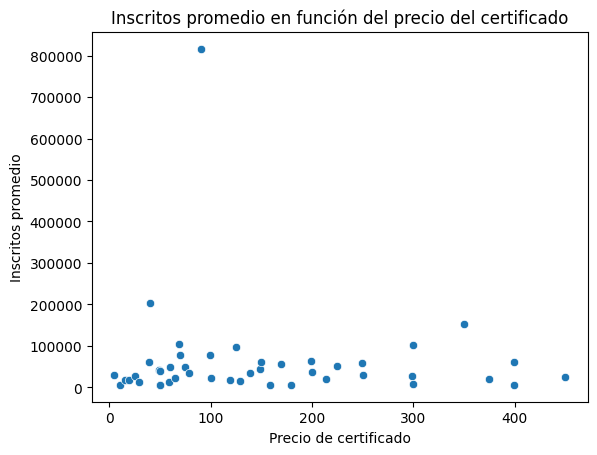

In [30]:
price_enrolled_avg = edx_df.groupby('certificate_price')['n_enrolled'].mean().reset_index()
sns.scatterplot(data=price_enrolled_avg, x='certificate_price', y='n_enrolled')
plt.xlabel('Precio de certificado')
plt.ylabel('Inscritos promedio')
plt.title('Inscritos promedio en función del precio del certificado')
plt.show()

In [31]:
price_enrolled_avg.describe()

,certificate_price,n_enrolled
count,47.000000,45.000000
mean,146.174255,60844.141006
std,118.936899,121808.564212
min,5.000000,5742.000000
25%,49.995000,18123.000000
50%,119.000000,34518.071429
75%,207.000000,60215.103448
max,450.000000,816114.750000


Encontramos un curso en particular con un numero de estudiantes inscritos muy por encima de los demas que sobrepasa los 800'000 integrantes, ademas de ciertos cursos con certificados con un valor superior a los $146 el cual es el promedio, esto puede ser debido a que pueden ser cursos con una extension muy larga o de instituciones con un costo de certificacion muy alto.

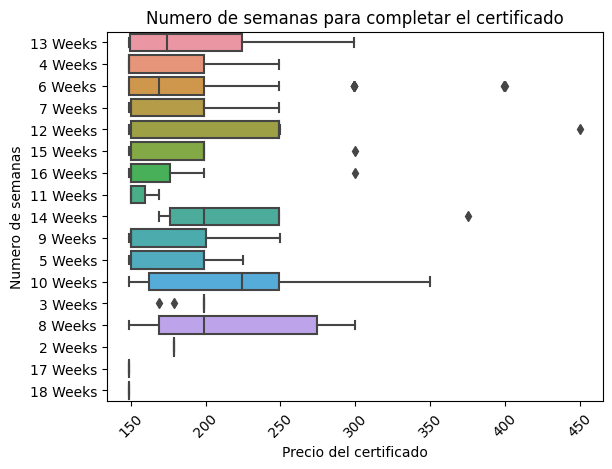

In [32]:
cer_df = edx_df.query("certificate_price > 146")

sns.boxplot(data=cer_df, x='certificate_price', y='course_length')
plt.xlabel('Precio del certificado')
plt.ylabel('Numero de semanas')
plt.title('Numero de semanas para completar el certificado')
plt.xticks(rotation=45)
plt.show()

Con esta grafica podemos concluir que los altos costos en algunas de estas certificaciones estan relacionados por la larga duracion de los mismos.

In [33]:
edx_df.query("n_enrolled >= 800000")

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,course_description,course_url,certificate_price
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271.0,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,"This is CS50x , Harvard University's introduct...",https://www.edx.org/course/cs50s-introduction-...,90.0
29,IELTS Academic Test Preparation,Prepare for the IELTS Academic tests in this c...,1103777.0,Self-paced on your time,The University of Queensland,Iain Mathieson-Martin Dutton-Megan Yucel-Steph...,Introductory,Communication,English,English,5–10 hours per week,8 Weeks,IELTS is the world's most popular English lang...,https://www.edx.org/course/ielts-academic-test...,99.0
31,TOEFL® Test Preparation: The Insider’s Guide,Prepare for the TOEFL® test and learn how to i...,1022489.0,Self-paced on your time,Educational Testing Service,Michael Knab-Cynthia Newman-Shawn Gorman-Molly...,Introductory,Communication,English,English,2–4 hours per week,6 Weeks,"This test preparation course, developed by the...",https://www.edx.org/course/toefl-test-preparat...,49.0


En este caso, podemos ver el alto numero de estudiantes registrados en estos cursos por su popularidad, 2 pruebas de ingles super reconocidas internacionalmente y el curso introductorio a la ciencia de la computacion, la cual es una carrera muy popular a nivel mundial, pero hay una cuestion mas importante que las mencionadas anteriormente.

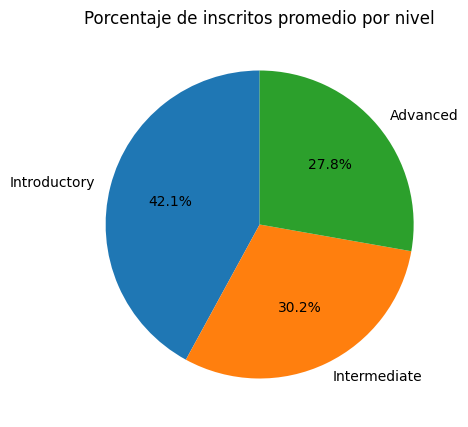

In [34]:
# level_df = edx_df.groupby('Level')['n_enrolled'].mean()
# students_per_level = pd.DataFrame({'level': level_df.index, 'n_enrolled': level_df.values})
# students_per_level = students_per_level.sort_values('n_enrolled', ascending=False)

# fig, ax = plt.subplots(figsize=(10, 2))
# sns.barplot(y='level', x='n_enrolled', data=students_per_level)
# plt.xlabel('Inscritos promedio')
# plt.ylabel('Nivel')
# plt.show()
level_df = edx_df.groupby('Level')['n_enrolled'].mean()
students_per_level = pd.DataFrame({'level': level_df.index, 'n_enrolled': level_df.values})
students_per_level = students_per_level.sort_values('n_enrolled', ascending=False)

fig, ax = plt.subplots(figsize=(5, 5))
plt.pie(students_per_level['n_enrolled'], labels=students_per_level['level'], autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de inscritos promedio por nivel')
plt.show()

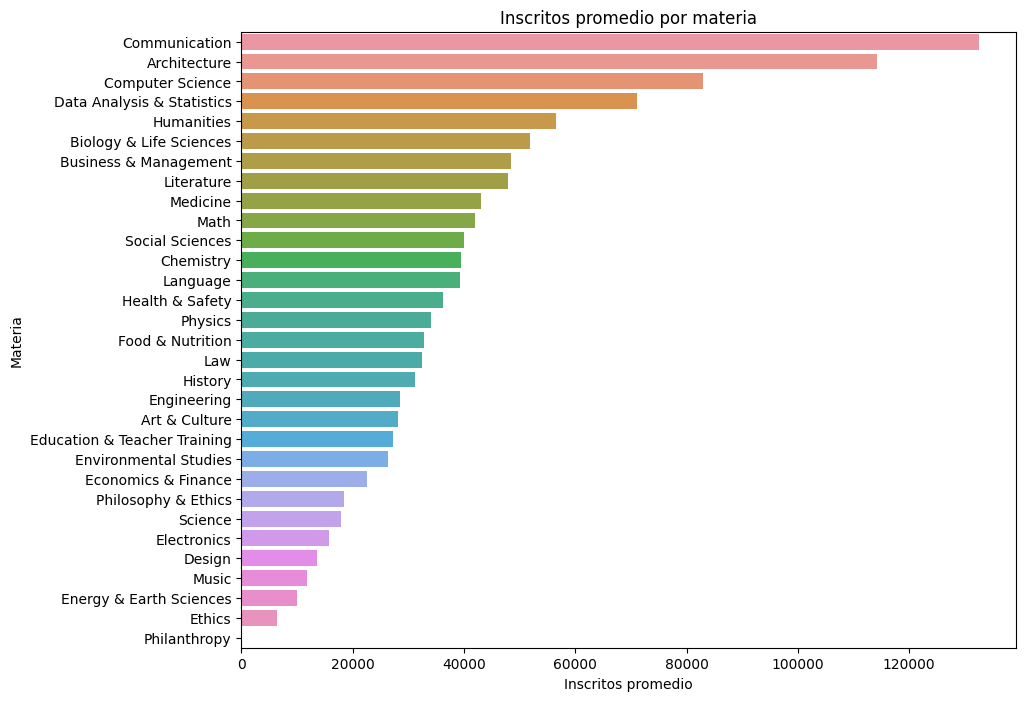

In [35]:
subject_df = edx_df.groupby('subject')['n_enrolled'].mean()
students_per_subject = pd.DataFrame({'subject': subject_df.index, 'n_enrolled': subject_df.values})
students_per_subject = students_per_subject.sort_values('n_enrolled', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y='subject', x='n_enrolled', data=students_per_subject)
plt.xlabel('Inscritos promedio')
plt.ylabel('Materia')
plt.title('Inscritos promedio por materia')
plt.show()


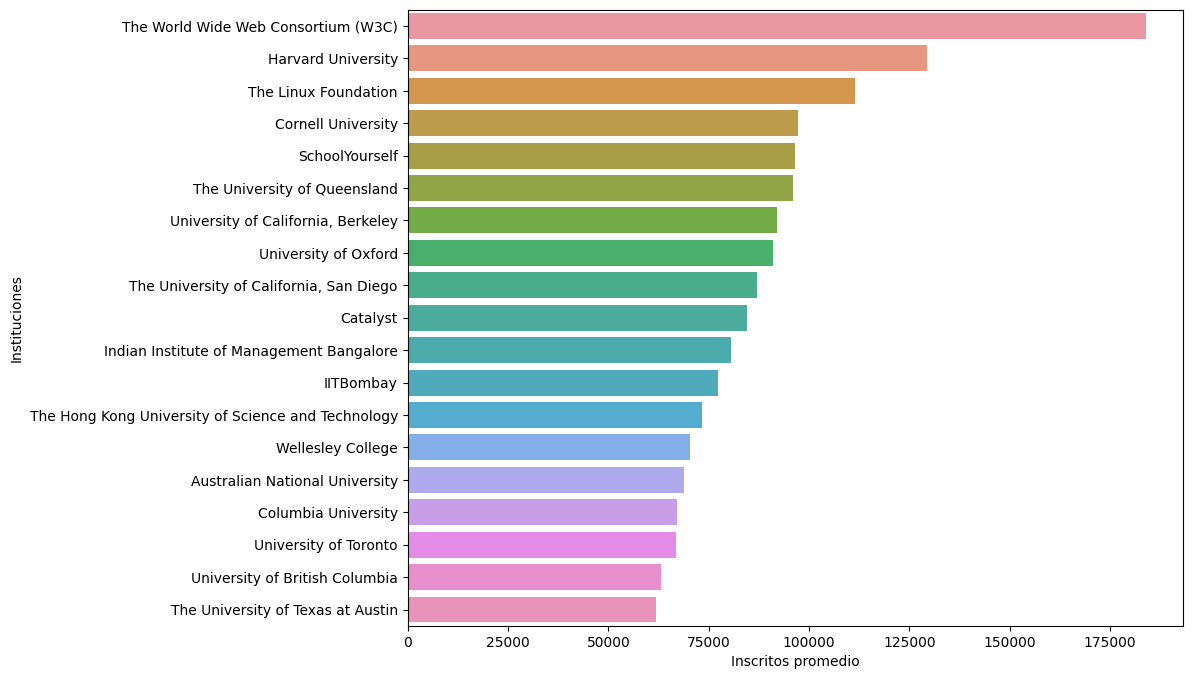

In [36]:
level_df = edx_df.groupby('institution')['n_enrolled'].mean()
students_per_institution = pd.DataFrame({'institution': level_df.index, 'n_enrolled': level_df.values})
students_per_institution = students_per_institution.sort_values('n_enrolled', ascending=False)

limit_institution = students_per_institution.head(20).iloc[1:]

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y='institution', x='n_enrolled', data=limit_institution)
plt.xlabel('Inscritos promedio')
plt.ylabel('Instituciones')
plt.show()


De esta manera podemos identificar la tematica de los cursos con mayor cantidad de estudiantes inscritos en promedio y el nivel de estudio de estos mismos, lo cual nos permite concluir que:

1. Los cursos mas populares son aquellos con tematicas introductorias.
2. Los cursos de idiomas, arquitectura y ciencia de la computacion son los mas populares y rentables a la hora de impartir.
3. El prestigio y el nombre de las instituciones que impartan el contenido puede influir.

### UDEMY

In [37]:
udemy_df = pd.read_csv('../datasets/udemy_courses.csv')

In [38]:
udemy_df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [39]:
udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


El tipo de los datos parece estar bien, exceptuando las columnas de published_timestamp y course_id, pero no seran cambiada ya que no seran tomada en cuenta a la hora de analizar los datos y crear el dashboard

Observemos si hay valores nulos en el df

In [40]:
udemy_df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Observamos si hay duplicados

In [41]:
udemy_df.loc[udemy_df.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


Por alguna razon pandas identifica estos registros como duplicados, pero podemos ver claramente que son diferentes... 

Observemos un analisis general de las variables numericas para ver si encontramos alguna irregularidad o outlier

In [42]:
udemy_df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


1. Todas las columnas, exceptuando la course_id, tienen un valor minimo de 0. Esto puede ser logico en la columna de price o y en la columna de num_reviews debido a que udemy tiene cursos gratuitos para los usuarios y el comentar o dejar una review es algo opcional y no obligatorio para los usuarios; pero en las demas no tienen mucho sentido.
2. La columna de num_lectures tiene la particularidad de tener un valor maximo de 779 clases, hay que observarlo.
3. La columna de content_duration no trae una unidad de tiempo especifica, pero con el valor maximo de la columna se puede concluir que puede ser en horas.

***1. Columnas con valor minimo de 0***

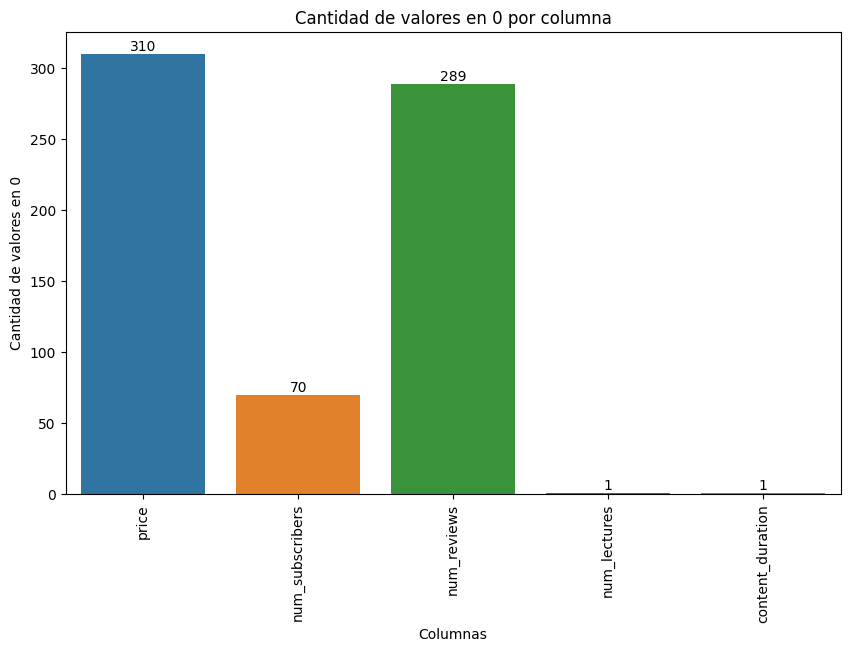

In [43]:
num_columns = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

zero_counts = (udemy_df[num_columns] == 0).sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_counts.index, y=zero_counts.values)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores en 0')
plt.title('Cantidad de valores en 0 por columna')
plt.xticks(rotation=90)

# Mostrar el número de valores faltantes en la parte superior de cada barra
for i, count in enumerate(zero_counts.values):
    plt.annotate(f'{count}', (i, count), ha='center', va='bottom')

plt.show()

In [44]:
subs = udemy_df.query('num_subscribers == 0')
display(subs)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
455,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.500000,2017-07-06T21:46:30Z,Business Finance
456,1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50,0,0,9,Beginner Level,2.000000,2017-07-03T21:40:32Z,Business Finance
457,1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,True,50,0,0,9,Intermediate Level,2.000000,2017-06-29T22:01:56Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
2402,1214670,Tune that Sour Note on Your Piano,https://www.udemy.com/how-to-tune-your-own-piano/,True,20,0,0,6,All Levels,0.550000,2017-06-20T21:46:40Z,Musical Instruments
2403,1272282,Learn Vikings Soundtracks on the Piano by Ear,https://www.udemy.com/learn-vikings-soundtrack...,True,20,0,0,8,All Levels,0.583333,2017-06-29T15:10:58Z,Musical Instruments
2404,1224186,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,True,35,0,0,13,Beginner Level,0.516667,2017-05-30T00:19:02Z,Musical Instruments
2405,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,https://www.udemy.com/abrsm-grade-iii-piano-cl...,True,20,0,0,5,Beginner Level,0.516667,2017-07-06T16:12:34Z,Musical Instruments


In [45]:
subs['num_reviews'].unique()

array([0], dtype=int64)

Podemos encontrar que la columna de num_subscribers tambien tiene logica de tener valores iguales a 0 debido a que no tienen ningun usuario suscrito a su programa y esto lo podemos corroborar tambien por el hecho que ninguno de estos cursos tampoco tienen comentarios algunos.

***2. Particularidad en el num_lectures***

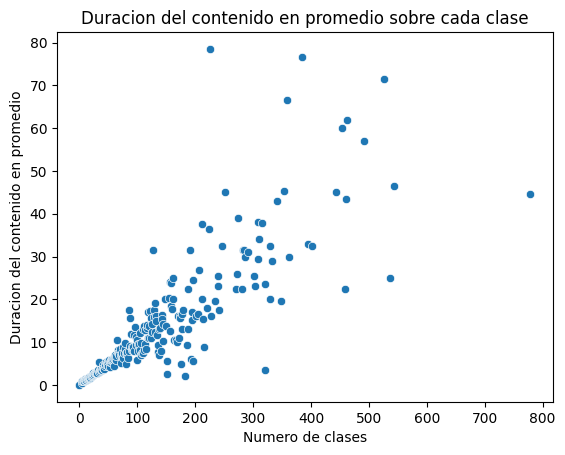

In [46]:
lecture_vs_duration = udemy_df.groupby('num_lectures')['content_duration'].mean().reset_index()
sns.scatterplot(data=lecture_vs_duration, x='num_lectures', y='content_duration')
plt.xlabel('Numero de clases')
plt.ylabel('Duracion del contenido en promedio')
plt.title('Duracion del contenido en promedio sobre cada clase')
plt.show()

Podemos encontrar un par de particularidades, la primera que hay clases en el las coordenadas (0,0), es decir, cero clases y cero tiempo de contenido; ademas de algunos outliers de numero de clases por encima de 400.

In [47]:
udemy_df.query('num_lectures == 0 and content_duration == 0')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
892,627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investo...,True,20,0,0,0,All Levels,0.0,2015-12-17T05:38:38Z,Business Finance


En el caso de este registro que presenta la misma particularidad de no tener ni content_duration ni num_lecture, es el error que se estaba buscando y debe ser eliminado.

In [48]:
udemy_df.drop(udemy_df.loc[udemy_df['course_id'] == 627332].index, inplace=True)

***Cantidad de cursos Gratis y pagos***

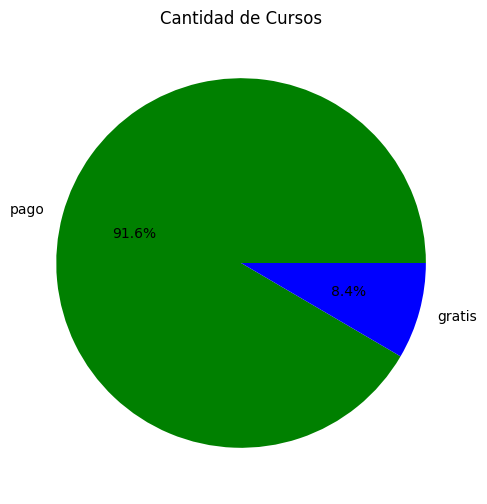

In [49]:
pago = udemy_df.copy()
pago['Pago'] = pago['is_paid'].map({True: 'pago', False: 'gratis'})
payment_counts = pago['Pago'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['green', 'blue'])
plt.title('Cantidad de Cursos')
plt.show()

Esto nos permite observar las proporciones y como puede llegar a ser rentable tener cierta cantidad de cursos gratis para atraer usuarios.

***Inscrito promedio por materia***

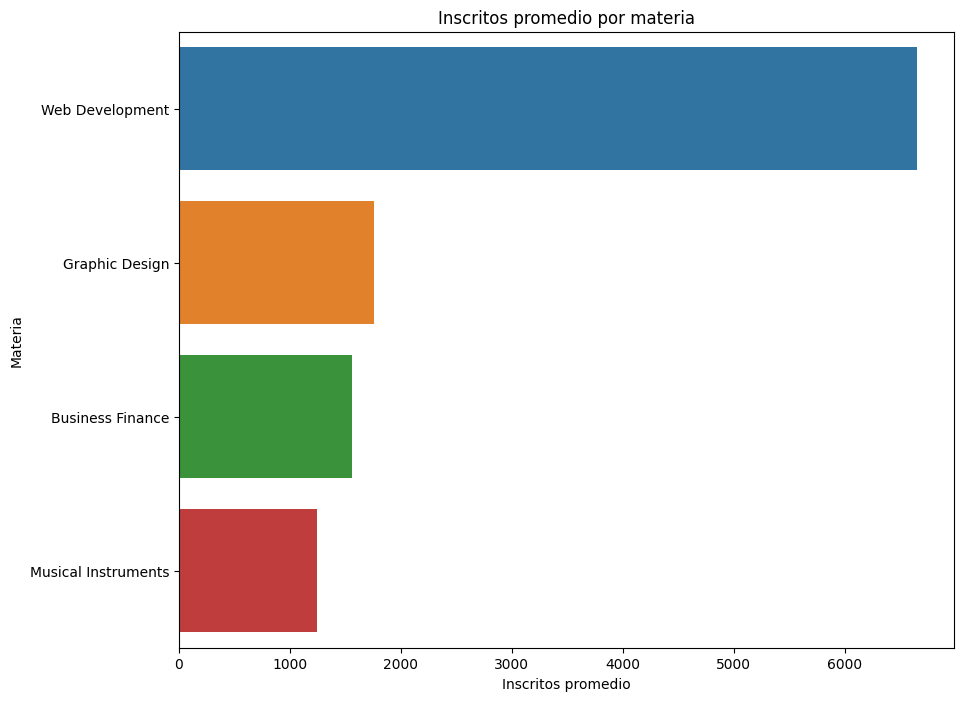

In [50]:
subject_df = udemy_df.groupby('subject')['num_subscribers'].mean()
students_per_subject = pd.DataFrame({'subject': subject_df.index, 'num_subscribers': subject_df.values})
students_per_subject = students_per_subject.sort_values('num_subscribers', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y='subject', x='num_subscribers', data=students_per_subject)
plt.xlabel('Inscritos promedio')
plt.ylabel('Materia')
plt.title('Inscritos promedio por materia')
plt.show()


Podemos ver la clase de cursos que predomina en la plataforma de Udemy

***Relacion numero de subscritos con el precio***

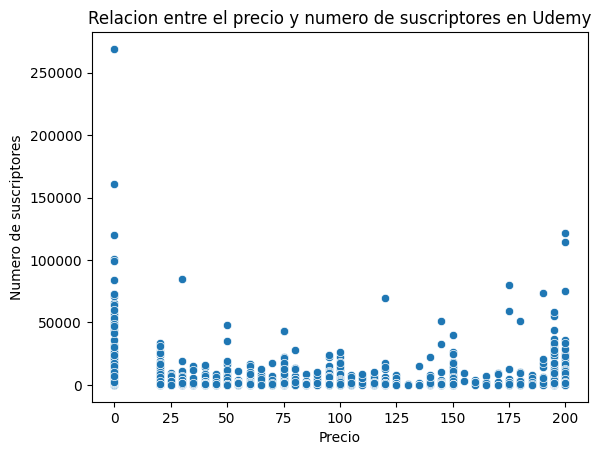

In [51]:
sns.scatterplot(data=udemy_df, x="price", y="num_subscribers")

plt.title("Relacion entre el precio y numero de suscriptores en Udemy")
plt.xlabel("Precio")
plt.ylabel("Numero de suscriptores")
plt.show()

Podemos encontrar una relacion clara entre el numero de estudiantes el precio de los cursos, mientras menor sea el costo mas gente hay escrita. Con ciertas excepciones.

### Word Cloud

In [52]:

df = pd.DataFrame()
df = pd.concat([merged_df["name"], edx_df["title"], udemy_df["course_title"]], axis=0)
df = df.rename("titulos")
titulos_df = pd.DataFrame(df)
titulos_df["titulos"] = titulos_df["titulos"].str.upper()

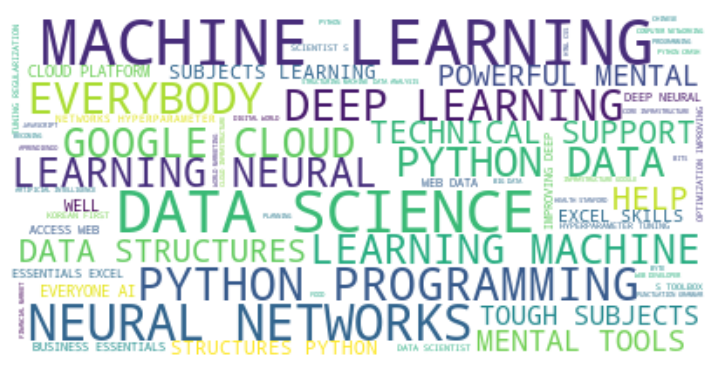

In [53]:
stop_words = set(STOPWORDS)
stop_words.update(["GETTING","STARTED","COURSE", "LEARN", "INTRODUCTION", "LA","Y", "EN", "PRACTICAL", "BEGINNER", "BEGINNERS", "OPTION", "COMPLETE", "BASIC", "BUILD", "DE", "GUIDE", "BASICS", "CREATE", "PROFESSIONAL", "USING", "ADVANCED", "STEP", "PROJECT", "PROJECTS", "MASTER", "BUILDING", "FUNDAMENTAL", "ESSENTIAL", "PLAY", "TECHNIQUE", "FUNDAMENTALS", "PARA", "LEVEL", "ULTIMATE", "MAKE"])

#creamos un texto
text = " ".join(titulos_df["titulos"])

#dimensiones
width = 1200
height = 1000 
#Generar wordcloud
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
#show
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#save
plt.savefig("../img/Aprendizaje.png", dpi=600)
#show
plt.show()

Este word cloud nos permite interpretar las tematicas u ocupaciones mas populares por los usuarios de los 3 diferentes MOOCs y junto a las observaciones encontradas anteriormente, considero que se puede llegar a dar un buen veredicto de que contenido agregar si quieres crear tu propio MOOC.

In [54]:
merged_df.to_parquet('../datasets/full_coursera.parquet', index=False)
edx_df.to_parquet('../datasets/edx_courses.parquet', index=False)
udemy_df.to_parquet('../datasets/udemy_courses.parquet', index=False)